<a href="https://colab.research.google.com/github/pg4094/Whatsapp-Chat-Analysis/blob/main/Whatsapp_Chats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dateparser

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import dateparser
from datetime import *
import datetime as dt
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
def read_file(data):
  x = open(data,'r')
  y = x.read()
  content = y.splitlines()
  return content

chat = read_file('/content/WhatsAppChat.txt')
len(chat)

42835

In [ ]:
joined = [line for line in chat if 'joined using this group' in line]
joined

["12/07/21, 12:42 pm - You joined using this group's invite link",
 "12/07/21, 12:42 pm - +91 70876 26253 joined using this group's invite link",
 "12/07/21, 12:43 pm - +91 88720 57146 joined using this group's invite link",
 "12/07/21, 12:43 pm - +91 90235 22555 joined using this group's invite link",
 "12/07/21, 12:43 pm - +91 78889 96579 joined using this group's invite link",
 "12/07/21, 12:43 pm - +91 78147 52175 joined using this group's invite link",
 "12/07/21, 12:43 pm - Vaibhav Chopra joined using this group's invite link",
 "12/07/21, 12:43 pm - +91 90345 56269 joined using this group's invite link",
 "12/07/21, 12:43 pm - +91 94178 01998 joined using this group's invite link",
 "12/07/21, 12:43 pm - +91 92153 94141 joined using this group's invite link",
 "12/07/21, 12:43 pm - +91 98961 26181 joined using this group's invite link",
 "12/07/21, 12:43 pm - +91 82956 65151 joined using this group's invite link",
 "12/07/21, 12:44 pm - +91 76588 39516 joined using this group's 

In [ ]:
chat = [line.strip() for line in chat]
print('Length of the chat is:',len(chat))

clean_chat = [line for line in chat if not 'joined using this group' in line]
clean_chat = [line for line in clean_chat if len(line)>1]
clean_chat = [line for line in clean_chat if not "Media omitted" in line]
clean_chat = [line for line in clean_chat if not "Prince" in line]

clean_chat

Length of the chat is: 42835


['12/07/21, 12:42 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '12/07/21, 12:41 pm - +91 78075 57450 created group "Group 32 unofficial"',
 '12/07/21, 12:44 pm - +91 82956 65151 left',
 '12/07/21, 12:46 pm - +91 78075 57450: do we have data science class today?',
 '12/07/21, 12:46 pm - +91 98961 26181: No',
 '12/07/21, 12:46 pm - +91 98725 52193: No',
 '12/07/21, 12:46 pm - +91 78075 57450: Okay',
 '12/07/21, 12:51 pm - +91 78147 52175: Aaj koi or class to nhi h?',
 '12/07/21, 12:52 pm - +91 78147 52175: Okay',
 '13/07/21, 9:09 am - +91 98554 94014: Aaj koi class hai kya data science ya data structures ki',
 '13/07/21, 9:12 am - +91 98554 94014: Link aya koi',
 '13/07/21, 9:12 am - +91 98554 94014: Ds ka',
 '13/07/21, 9:18 am - +91 78075 57450: Abhi tak to nhi',
 '13/07/21, 9:32 am - +91 82890 26681: Ayea link  ??',
 '13/07/21, 9:32 am - +91 88720 30003: https://live.codequotient.com/

In [ ]:
left = [line for line in clean_chat if  line.endswith("left")]
left

['12/07/21, 12:44 pm - +91 82956 65151 left',
 '18/07/21, 1:22 am - +91 88721 91221 left',
 '20/07/21, 10:57 am - +91 80546 47096 left',
 '22/07/21, 12:05 am - +91 88721 91221 left',
 '26/07/21, 7:27 pm - +91 99888 49311 left',
 '30/07/21, 1:22 pm - +91 89881 36662 left',
 '03/08/21, 5:00 pm - +91 87092 20981 left',
 '04/08/21, 10:42 am - +91 86848 61507 left',
 '21/08/21, 11:20 am - +91 82198 38978 left',
 '28/08/21, 2:06 pm - +91 94604 31136: i left',
 '31/08/21, 3:39 pm - +91 87259 36898 left',
 '11/09/21, 11:11 am - +91 94786 55431: 40 left',
 '11/09/21, 12:08 pm - +91 72063 60685 left',
 '17/09/21, 10:59 am - +91 93500 15686 left',
 '21/09/21, 12:04 am - +91 6388 167 861 left',
 '21/09/21, 12:23 am - +91 93563 90290 left',
 '21/09/21, 12:24 am - +91 6395 774 154 left',
 '21/09/21, 12:38 am - +91 78373 53617 left',
 '21/09/21, 1:05 am - +91 98158 47211 left',
 '21/09/21, 8:07 am - +91 78767 95664 left',
 '21/09/21, 8:31 am - +91 6280 572 805 left',
 '21/09/21, 8:48 am - +91 94649 4

In [ ]:
#Drop 'left-ers'
clean_chat = [line for line in clean_chat if not line.endswith("left")]
clean_chat

['12/07/21, 12:42 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '12/07/21, 12:41 pm - +91 78075 57450 created group "Group 32 unofficial"',
 '12/07/21, 12:46 pm - +91 78075 57450: do we have data science class today?',
 '12/07/21, 12:46 pm - +91 98961 26181: No',
 '12/07/21, 12:46 pm - +91 98725 52193: No',
 '12/07/21, 12:46 pm - +91 78075 57450: Okay',
 '12/07/21, 12:51 pm - +91 78147 52175: Aaj koi or class to nhi h?',
 '12/07/21, 12:52 pm - +91 78147 52175: Okay',
 '13/07/21, 9:09 am - +91 98554 94014: Aaj koi class hai kya data science ya data structures ki',
 '13/07/21, 9:12 am - +91 98554 94014: Link aya koi',
 '13/07/21, 9:12 am - +91 98554 94014: Ds ka',
 '13/07/21, 9:18 am - +91 78075 57450: Abhi tak to nhi',
 '13/07/21, 9:32 am - +91 82890 26681: Ayea link  ??',
 '13/07/21, 9:32 am - +91 88720 30003: https://live.codequotient.com/room/1626104442498?courseId=60ebf96118fb141d3e

In [ ]:
#Merge messages that belong together
msgs = [] #message container
pos = 0
"""
For every line, see if it matches the expression which is starting with the format "number(s)+slash" eg "12/"
If it does, it is a new line of conversion as they begin with dates, add it to msgs container
Else, it is a continuation of the previous line, add it to the previous line and append to msgs, then pop previous line.
"""
for line in clean_chat:
    if re.findall("\A\d+[/]", line):#\A mathes from starting of string,\d for mathing numbersfrom[0-9]
        msgs.append(line)
        pos += 1
    else:
        take = msgs[pos-1] + ". " + line
        msgs.append(take)
        msgs.pop(pos-1)
len(msgs)

28434

In [ ]:
msgs[0:10]

['12/07/21, 12:42 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '12/07/21, 12:41 pm - +91 78075 57450 created group "Group 32 unofficial"',
 '12/07/21, 12:46 pm - +91 78075 57450: do we have data science class today?',
 '12/07/21, 12:46 pm - +91 98961 26181: No',
 '12/07/21, 12:46 pm - +91 98725 52193: No',
 '12/07/21, 12:46 pm - +91 78075 57450: Okay',
 '12/07/21, 12:51 pm - +91 78147 52175: Aaj koi or class to nhi h?',
 '12/07/21, 12:52 pm - +91 78147 52175: Okay',
 '13/07/21, 9:09 am - +91 98554 94014: Aaj koi class hai kya data science ya data structures ki',
 '13/07/21, 9:12 am - +91 98554 94014: Link aya koi']

In [ ]:
time = [msgs[i].split(',')[1].split('-')[0] for i in range(len(msgs))]
time = [s.strip(' ') for s in time] # Remove spacing
print("length of time is:")
print(len(time))
time

length of time is:
28434


['12:42 pm',
 '12:41 pm',
 '12:46 pm',
 '12:46 pm',
 '12:46 pm',
 '12:46 pm',
 '12:51 pm',
 '12:52 pm',
 '9:09 am',
 '9:12 am',
 '9:12 am',
 '9:18 am',
 '9:32 am',
 '9:32 am',
 '9:32 am',
 '9:33 am',
 '9:33 am',
 '9:33 am',
 '9:34 am',
 '9:34 am',
 '9:34 am',
 '9:35 am',
 '9:35 am',
 '9:35 am',
 '9:35 am',
 '9:35 am',
 '9:35 am',
 '9:36 am',
 '9:36 am',
 '9:36 am',
 '9:36 am',
 '9:36 am',
 '9:44 am',
 '9:45 am',
 '9:45 am',
 '9:45 am',
 '9:45 am',
 '9:45 am',
 '9:46 am',
 '9:46 am',
 '9:46 am',
 '9:46 am',
 '9:46 am',
 '9:46 am',
 '9:46 am',
 '9:47 am',
 '9:47 am',
 '9:47 am',
 '9:47 am',
 '9:47 am',
 '9:48 am',
 '9:48 am',
 '9:48 am',
 '9:49 am',
 '9:49 am',
 '9:49 am',
 '9:50 am',
 '9:50 am',
 '9:50 am',
 '9:50 am',
 '9:50 am',
 '9:50 am',
 '9:50 am',
 '9:51 am',
 '9:51 am',
 '9:51 am',
 '9:51 am',
 '9:51 am',
 '9:51 am',
 '9:52 am',
 '9:52 am',
 '9:52 am',
 '9:53 am',
 '9:53 am',
 '9:53 am',
 '9:53 am',
 '9:53 am',
 '9:53 am',
 '9:54 am',
 '9:54 am',
 '9:55 am',
 '9:55 am',
 '9:55 a

In [ ]:
date = [msgs[i].split(',')[0] for i in range(len(msgs))]
len(date)

name = [msgs[i].split('-')[1].split(':')[0] for i in range(len(msgs))]
len(name)

content = []
for i in range(len(msgs)):
  try:
    content.append(msgs[i].split(':')[2])
  except IndexError:
    content.append('Missing Text')
len(content)

28434

In [ ]:
df = pd.DataFrame(list(zip(date, time, name, content)), columns = ['Date', 'Time', 'Name', 'Content'])
df

,Date,Time,Name,Content
0,12/07/21,12:42 pm,Messages and calls are end,Missing Text
1,12/07/21,12:41 pm,"+91 78075 57450 created group ""Group 32 unoff...",Missing Text
2,12/07/21,12:46 pm,+91 78075 57450,do we have data science class today?
3,12/07/21,12:46 pm,+91 98961 26181,No
4,12/07/21,12:46 pm,+91 98725 52193,No
...,...,...,...,...
28429,30/11/21,8:59 am,+91 94634 77221,Haaa
28430,30/11/21,8:59 am,+91 94634 77221,Bus to roz hi arhai hai vese toh
28431,30/11/21,8:59 am,+91 94634 77221,Saturday ka confirm krlo ek baar
28432,30/11/21,10:12 am,+91 70099 08381,Aaj class hai


In [ ]:
df = df[df["Content"]!='Missing Text']
df.reset_index(inplace=True, drop=True)
df

,Date,Time,Name,Content
0,12/07/21,12:46 pm,+91 78075 57450,do we have data science class today?
1,12/07/21,12:46 pm,+91 98961 26181,No
2,12/07/21,12:46 pm,+91 98725 52193,No
3,12/07/21,12:46 pm,+91 78075 57450,Okay
4,12/07/21,12:51 pm,+91 78147 52175,Aaj koi or class to nhi h?
...,...,...,...,...
28382,30/11/21,8:59 am,+91 94634 77221,Haaa
28383,30/11/21,8:59 am,+91 94634 77221,Bus to roz hi arhai hai vese toh
28384,30/11/21,8:59 am,+91 94634 77221,Saturday ka confirm krlo ek baar
28385,30/11/21,10:12 am,+91 70099 08381,Aaj class hai


In [ ]:
df = df[df["Content"]!='Missing Text']
df.reset_index(inplace=True, drop=True)
df

,Date,Time,Name,Content
0,12/07/21,12:46 pm,+91 78075 57450,do we have data science class today?
1,12/07/21,12:46 pm,+91 98961 26181,No
2,12/07/21,12:46 pm,+91 98725 52193,No
3,12/07/21,12:46 pm,+91 78075 57450,Okay
4,12/07/21,12:51 pm,+91 78147 52175,Aaj koi or class to nhi h?
...,...,...,...,...
28382,30/11/21,8:59 am,+91 94634 77221,Haaa
28383,30/11/21,8:59 am,+91 94634 77221,Bus to roz hi arhai hai vese toh
28384,30/11/21,8:59 am,+91 94634 77221,Saturday ka confirm krlo ek baar
28385,30/11/21,10:12 am,+91 70099 08381,Aaj class hai


In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['DateTime']

0       2021-12-07 12:46:00
1       2021-12-07 12:46:00
2       2021-12-07 12:46:00
3       2021-12-07 12:46:00
4       2021-12-07 12:51:00
                ...        
28382   2021-11-30 08:59:00
28383   2021-11-30 08:59:00
28384   2021-11-30 08:59:00
28385   2021-11-30 10:12:00
28386   2021-11-30 10:20:00
Name: DateTime, Length: 28387, dtype: datetime64[ns]

In [ ]:
df['weekday'] = df['DateTime'].apply(lambda x: x.day_name())

In [ ]:
df['Letter_Count'] = df['Content'].apply(lambda s : len(s))
df['Word_Count'] = df['Content'].apply(lambda s : len(s.split(' ')))

In [ ]:
df['Hour'] = df['Time'].apply(lambda x : x.split(':')[0])
# The first token of a value in the Time Column contains the hour (Eg., "12" in "12:15")

In [ ]:
df.head()

,Date,Time,Name,Content,DateTime,weekday,Letter_Count,Word_Count,Hour
0,12/07/21,12:46 pm,+91 78075 57450,do we have data science class today?,2021-12-07 12:46:00,Tuesday,37,8,12
1,12/07/21,12:46 pm,+91 98961 26181,No,2021-12-07 12:46:00,Tuesday,3,2,12
2,12/07/21,12:46 pm,+91 98725 52193,No,2021-12-07 12:46:00,Tuesday,3,2,12
3,12/07/21,12:46 pm,+91 78075 57450,Okay,2021-12-07 12:46:00,Tuesday,5,2,12
4,12/07/21,12:51 pm,+91 78147 52175,Aaj koi or class to nhi h?,2021-12-07 12:51:00,Tuesday,27,8,12


In [ ]:
df.to_csv("WhatsappChat.csv")

In [ ]:
m_a = df['Name'].value_counts()#m_a is mostly_active
m_a.head(10)


 +91 88720 30003     6582
 +91 6388 167 861    5396
 +91 94786 55431     2856
 +91 70876 26253     1401
 +91 80725 79821     1196
 +91 70099 08381      948
 +91 6395 774 154     861
 +91 76588 39516      705
 +91 6280 572 805     609
 +91 92122 36223      544
Name: Name, dtype: int64

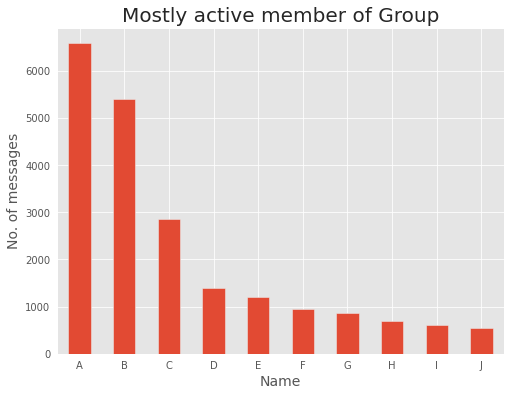

In [ ]:
plt.figure(figsize=(8,6))
mostly_active = df['Name'].value_counts()
### Top 10 peoples that are mostly active in our Group is : 
m_a = mostly_active.head(10)
bars = [chr(x) for x in range(ord('A'),ord('J')+1)]
#bars = ['A','B','C','D','E','F','G','H','I','J']
x_pos = np.arange(len(bars))
m_a.plot.bar()
plt.xlabel('Name',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of Group',fontdict={'fontsize': 20,'fontweight': 8})
plt.xticks(x_pos, bars, rotation = 'horizontal')
plt.show()

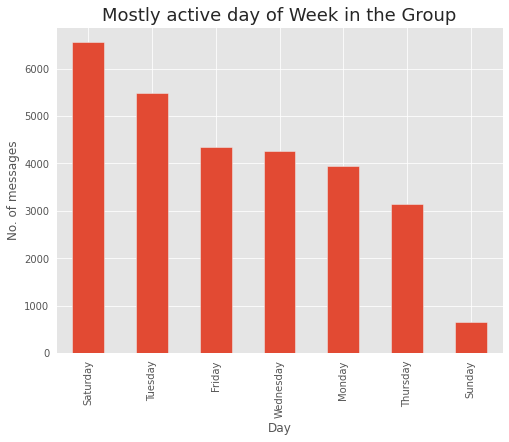

In [ ]:
plt.figure(figsize=(8,6))
a_d = df['weekday'].value_counts()
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Mostly active day of Week in the Group',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

In [ ]:
df.astype(str)

,Date,Time,Name,Content,DateTime,weekday,Letter_Count,Word_Count,Hour
0,12/07/21,12:46 pm,+91 78075 57450,do we have data science class today?,2021-12-07 12:46:00,Tuesday,37,8,12
1,12/07/21,12:46 pm,+91 98961 26181,No,2021-12-07 12:46:00,Tuesday,3,2,12
2,12/07/21,12:46 pm,+91 98725 52193,No,2021-12-07 12:46:00,Tuesday,3,2,12
3,12/07/21,12:46 pm,+91 78075 57450,Okay,2021-12-07 12:46:00,Tuesday,5,2,12
4,12/07/21,12:51 pm,+91 78147 52175,Aaj koi or class to nhi h?,2021-12-07 12:51:00,Tuesday,27,8,12
...,...,...,...,...,...,...,...,...,...
28382,30/11/21,8:59 am,+91 94634 77221,Haaa,2021-11-30 08:59:00,Tuesday,5,2,8
28383,30/11/21,8:59 am,+91 94634 77221,Bus to roz hi arhai hai vese toh,2021-11-30 08:59:00,Tuesday,33,9,8
28384,30/11/21,8:59 am,+91 94634 77221,Saturday ka confirm krlo ek baar,2021-11-30 08:59:00,Tuesday,33,7,8
28385,30/11/21,10:12 am,+91 70099 08381,Aaj class hai,2021-11-30 10:12:00,Tuesday,14,4,10


In [ ]:
df.dtypes

Date                    object
Time                    object
Name                    object
Content                 object
DateTime        datetime64[ns]
weekday                 object
Letter_Count             int64
Word_Count               int64
Hour                    object
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Mon'] = df['Date'].dt.month
months = {
     1 : 'Jan',
     2 : 'Feb',
     3 : 'Mar',
     4 : 'Apr',
     5 : 'May',
     6 : 'Jun',
     7 : 'Jul',
     8 : 'Aug',
     9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}
df['Month'] = df['Mon'].map(months)
df.drop('Mon',axis=1,inplace=True)

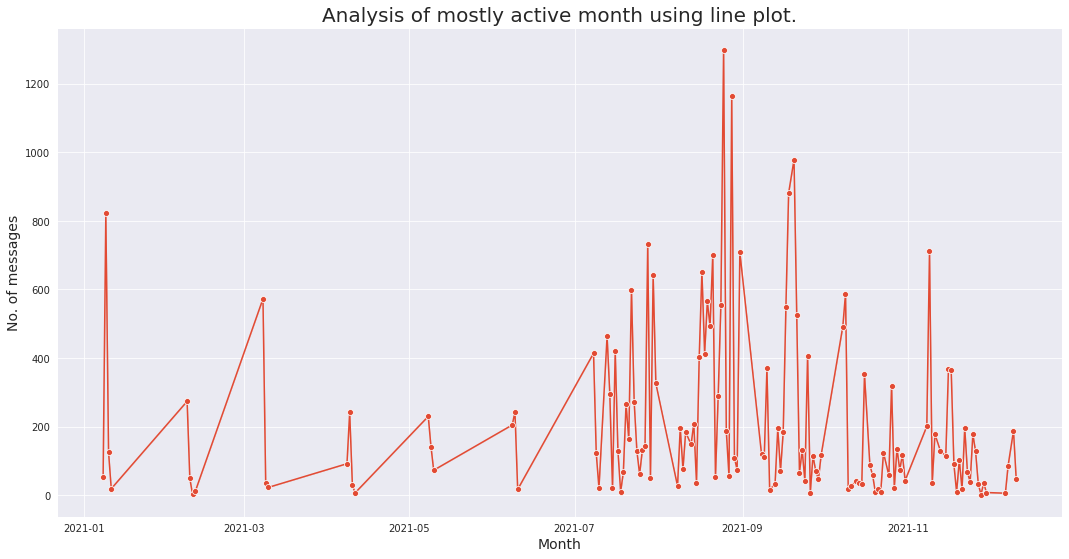

In [ ]:
z = df['Date'].value_counts() 
z1 = z.to_dict() #converts to dictionary
df['Msg_count_monthly'] = df['Date'].map(z1)
plt.figure(figsize=(18,9))
sns.set_style("darkgrid")
sns.lineplot(data=df,x='Date',y='Msg_count_monthly',markers=True,marker='o')
plt.xlabel('Month',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of mostly active month using line plot.',fontdict={'fontsize': 20,'fontweight': 8})
plt.show()

In [ ]:
df2 = df.groupby(['Hours', 'Day'], as_index=False)["Message"].count()
df2 = df2.dropna()
df2.reset_index(drop = True,inplace = True)
### Analysing on which time group is mostly active based on hours and day.
analysis_2_df = df.groupby(['Hours', 'Day'], as_index=False)["Message"].count()
### Droping null values
analysis_2_df.dropna(inplace=True)
analysis_2_df.sort_values(by=['Message'],ascending=False)
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(15,8))
heatmap(
    x=analysis_2_df['Hours'],
    y=analysis_2_df['Day'],
    size_scale = 500,
    size = analysis_2_df['Message'], 
    y_order = day_of_week[::-1],
    color = analysis_2_df['Message'], 
    palette = sns.cubehelix_palette(128)
)
plt.show()
 


KeyError: ignored